In [1]:
import os
import io
import pandas as pd
from google.cloud import storage
import ast
import matplotlib.pyplot as plt 
import seaborn as sns

##### accounts_attendance

In [2]:
accounts_attendance = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_attendance.parquet', engine='pyarrow')

In [3]:
accounts_attendance

,id,attendance_date_list,user_id
0,1,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1446852
1,2,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1359398
2,3,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1501542
3,4,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1507767
4,5,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1287453
...,...,...,...
349632,360501,[],897005
349633,360502,"[""2024-05-09""]",1407059
349634,360503,"[""2024-05-09""]",1583727
349635,360504,"[""2024-05-09""]",1392372


In [6]:
accounts_attendance.isnull().sum()

id                      0
attendance_date_list    0
user_id                 0
dtype: int64

In [7]:
accounts_attendance.duplicated().sum()

0

In [8]:
accounts_attendance['attendance_date_list'] = accounts_attendance['attendance_date_list'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
# 한 번도 접속하지 않은 이용자는 20945명이다.
accounts_attendance.explode('attendance_date_list').isnull().sum()

id                          0
attendance_date_list    20945
user_id                     0
dtype: int64

In [ ]:
# 출석 시간이 중복되는 이용자는 0명이다다
accounts_attendance.explode('attendance_date_list').duplicated(subset=['attendance_date_list','user_id']).sum()

0

##### accounts_blockrecord

In [3]:
accounts_blockrecord = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_blockrecord.parquet', engine='pyarrow')

In [19]:
accounts_blockrecord

,id,reason,created_at,block_user_id,user_id
0,1,그냥...,2023-05-04 23:01:53,867483,878476
1,2,친구 사이가 어색해짐,2023-05-05 01:17:08,867190,867564
2,3,나랑 관련 없는 질문을 자꾸 보냄,2023-05-05 01:50:55,875110,875261
3,6,그냥...,2023-05-05 05:21:52,883696,883511
4,7,그냥...,2023-05-05 06:40:34,871349,870177
...,...,...,...,...,...
19477,25355,사칭 계정,2024-04-05 08:15:03,875351,879416
19478,25356,친구 사이가 어색해짐,2024-04-25 09:28:19,1444256,1292346
19479,25357,친구 사이가 어색해짐,2024-04-25 09:28:24,1379126,1292346
19480,25360,모르는 사람임,2024-05-05 11:06:31,1582869,1583612


In [27]:
accounts_blockrecord.loc[accounts_blockrecord.duplicated(subset=['block_user_id','user_id'],keep = False) == True]

,id,reason,created_at,block_user_id,user_id
8,12,기타,2023-05-05 13:04:31,885794,879662
9,13,기타,2023-05-05 13:04:42,885794,879662
10,14,그냥...,2023-05-05 13:04:52,885794,879662
11,15,기타,2023-05-05 13:04:56,885794,879662
12,16,기타,2023-05-05 13:05:01,885794,879662
...,...,...,...,...,...
19228,24886,모르는 사람임,2023-08-15 18:38:41,992181,1072478
19240,24899,친구 사이가 어색해짐,2023-08-18 12:12:28,1500131,1365572
19248,24912,모르는 사람임,2023-08-21 23:12:23,1029653,955098
19295,25105,모르는 사람임,2023-09-11 14:09:18,1019326,976341


In [4]:
accounts_blockrecord.isnull().sum()

id               0
reason           0
created_at       0
block_user_id    0
user_id          0
dtype: int64

##### accounts_failpaymenthistory

In [28]:
accounts_failpaymenthistory = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_failpaymenthistory.parquet', engine='pyarrow')

In [31]:
accounts_failpaymenthistory

,id,productId,phone_type,created_at,user_id
0,6,heart.200,A,2023-05-14 05:49:22,1055891
1,7,heart.777,A,2023-05-14 08:17:21,1152151
2,8,heart.777,A,2023-05-14 10:11:46,986200
3,9,heart.1000,A,2023-05-14 11:53:09,1028261
4,10,heart.777,A,2023-05-14 12:30:47,1235730
...,...,...,...,...,...
158,170,heart.777,A,2023-07-28 08:31:19,1254708
159,171,None,I,2023-08-12 11:26:59,1556867
160,172,heart.777,A,2023-08-14 23:47:46,1282373
161,173,None,I,2023-09-17 09:12:53,927108


In [30]:
accounts_failpaymenthistory.isnull().sum()

id              0
productId     107
phone_type      0
created_at      0
user_id         0
dtype: int64

In [35]:
accounts_failpaymenthistory.loc[accounts_failpaymenthistory['productId'].isnull() == True,'phone_type'].unique()

array(['I'], dtype=object)

##### accounts_friendrequest

In [2]:
accounts_friendrequest = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_friendrequest.parquet', engine='pyarrow')

In [3]:
accounts_friendrequest

,id,status,created_at,updated_at,receive_user_id,send_user_id
0,7,P,2023-04-17 18:29:11,2023-04-17 18:29:11,831962,837521
1,10,A,2023-04-17 18:29:11,2023-04-22 06:02:53,832151,837521
2,11,A,2023-04-17 18:29:11,2023-04-18 19:28:41,832340,837521
3,13,A,2023-04-17 18:29:11,2023-04-19 11:05:04,833041,837521
4,20,P,2023-04-17 18:29:11,2023-04-17 18:29:11,834415,837521
...,...,...,...,...,...,...
17147170,19692975,P,2024-05-09 07:24:50,2024-05-09 07:24:50,1583730,1583731
17147171,19692976,A,2024-05-09 07:31:41,2024-05-09 07:33:06,1583731,1583673
17147172,19692977,P,2024-05-09 08:20:44,2024-05-09 08:20:44,1299129,1575671
17147173,19692978,R,2024-05-09 09:19:40,2024-05-09 09:19:43,1304403,1392729


In [4]:
accounts_friendrequest.isnull().sum()

id                 0
status             0
created_at         0
updated_at         0
receive_user_id    0
send_user_id       0
dtype: int64

In [9]:
accounts_friendrequest.groupby(['receive_user_id'])[['send_user_id']].count().reset_index().sort_values(by='send_user_id',ascending=False)

,receive_user_id,send_user_id
59349,909685,218
14991,857348,199
64689,915445,198
10898,852224,195
220018,1083638,190
...,...,...
586160,1490579,1
482285,1372948,1
629462,1540454,1
646667,1560385,1


##### accounts_group

In [10]:
accounts_group = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_group.parquet', engine='pyarrow')

In [11]:
accounts_group

,id,grade,class_num,school_id
0,1,1,1,1
1,8,3,2,1
2,9,3,3,1
3,10,2,2,1
4,11,2,3,1
...,...,...,...,...
84510,84542,3,2,5107
84511,84543,2,7,3487
84512,84544,3,1,5043
84513,84545,2,7,416


In [12]:
accounts_group.isnull().sum()

id           0
grade        0
class_num    0
school_id    0
dtype: int64

##### accounts_nearbyschool

In [13]:
accounts_nearbyschool = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_nearbyschool.parquet', engine='pyarrow')

In [14]:
accounts_nearbyschool

,id,distance,nearby_school_id,school_id
0,119021,0.004564,6,7
1,119022,0.010787,13,7
2,119023,0.012928,20,7
3,119024,0.013590,4,7
4,119025,0.014122,24,7
...,...,...,...,...
59495,178516,0.018277,1498,5961
59496,178517,0.018652,1474,5961
59497,178518,0.021143,1466,5961
59498,178519,0.024572,1467,5961


In [15]:
accounts_nearbyschool.isnull().sum()

id                  0
distance            0
nearby_school_id    0
school_id           0
dtype: int64

##### accounts_paymenthistory

In [7]:
accounts_paymenthistory = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_paymenthistory.parquet', engine='pyarrow')

In [17]:
accounts_paymenthistory

,id,productId,phone_type,created_at,user_id
0,6,heart.777,A,2023-05-13 21:28:34,1211127
1,7,heart.777,A,2023-05-13 21:29:39,1151343
2,8,heart.777,A,2023-05-13 21:31:33,1002147
3,9,heart.777,A,2023-05-13 21:31:39,1095040
4,11,heart.777,A,2023-05-13 21:34:32,1164081
...,...,...,...,...,...
95135,98074,heart.777,I,2024-05-06 14:51:27,1086654
95136,98075,heart.1000,I,2024-05-06 16:06:30,871740
95137,98076,heart.1000,I,2024-05-08 06:57:23,1166361
95138,98077,heart.1000,I,2024-05-08 14:12:45,1163480


In [18]:
accounts_paymenthistory.isnull().sum()

id            0
productId     0
phone_type    0
created_at    0
user_id       0
dtype: int64

In [3]:
payment = accounts_paymenthistory.groupby('user_id')['id'].count().reset_index().sort_values(by='id', ascending=False)

In [25]:
payment

,user_id,id
55604,1527451,60
27744,1246471,51
17651,1141603,35
23067,1204373,34
17740,1142775,30
...,...,...
22263,1196164,1
22264,1196170,1
22265,1196185,1
22266,1196197,1


In [29]:
accounts_paymenthistory['productId'].unique()

array(['heart.777', 'heart.200', 'heart.4000', 'heart.1000'], dtype=object)

In [14]:
accounts_paymenthistory['plus_point'] = accounts_paymenthistory['productId'].map(lambda x: int(x.split('.')[1]))

In [27]:
payment_plus_point = accounts_paymenthistory.groupby(['user_id'])[['plus_point']].sum().sort_values(by='plus_point', ascending=False).reset_index()

In [58]:
payment_plus_point

,user_id,plus_point
0,1141603,75977
1,1167602,56777
2,1216899,49977
3,1111139,44777
4,1246471,42977
...,...,...
59187,1471470,200
59188,1488005,200
59189,1417284,200
59190,1549489,200


##### accounts_user_contacts

In [2]:
accounts_user_contacts = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_user_contacts.parquet', engine='pyarrow')

In [4]:
accounts_user_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   5063 non-null   int64 
 1   contacts_count       5063 non-null   int64 
 2   invite_user_id_list  5063 non-null   object
 3   user_id              5063 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 158.3+ KB


In [5]:
accounts_user_contacts['invite_user_id_list'] = accounts_user_contacts['invite_user_id_list'].map(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [9]:
accounts_user_contacts.explode('invite_user_id_list').sort_values(by='contacts_count',ascending=False)

,id,contacts_count,invite_user_id_list,user_id
35,36063,114,NaN,873573
380,141577,107,871350,877693
1152,675242,99,NaN,947480
1303,775480,92,1180993,1266116
1303,775480,92,1171380,1266116
...,...,...,...,...
2504,1541875,1,NaN,1028993
2525,1573304,1,NaN,880171
5060,14465598,0,NaN,1577436
5061,14579987,0,NaN,1582145


In [ ]:
accounts_user_contacts.explode('invite_user_id_list').isnull().sum()

id                        0
contacts_count            0
invite_user_id_list    3905
user_id                   0
dtype: int64

##### accounts_pointhistory

In [3]:
accounts_pointhistory = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_pointhistory.parquet', engine='pyarrow')

In [ ]:
accounts_pointhistory

,id,delta_point,created_at,user_id,user_question_record_id
0,790629,9,2023-04-28 12:27:49,849436,771777.0
1,790652,9,2023-04-28 12:28:02,849436,771800.0
2,790664,5,2023-04-28 12:28:09,849436,771812.0
3,790680,13,2023-04-28 12:28:16,849436,771828.0
4,790703,5,2023-04-28 12:28:26,849436,771851.0
...,...,...,...,...,...
2338913,340672371,14,2024-05-08 01:35:02,855509,161666462.0
2338914,340672372,11,2024-05-08 01:36:00,855525,161666463.0
2338915,340672373,11,2024-05-08 01:36:00,855526,161666463.0
2338916,340672374,12,2024-05-08 01:36:18,855525,161666464.0


In [13]:
accounts_pointhistory.isnull().sum()

id                            0
delta_point                   0
created_at                    0
user_id                       0
user_question_record_id    2992
dtype: int64

In [7]:
accounts_pointhistory.describe()

,id,delta_point,created_at,user_id,user_question_record_id
count,2.338918e+06,2.338918e+06,2338918,2.338918e+06,2.335926e+06
mean,1.265364e+08,8.610862e-01,2023-05-18 03:06:43.825683968,1.111554e+06,6.141803e+07
min,7.906290e+05,-1.000000e+03,2023-04-28 12:27:49,8.380230e+05,7.717770e+05
25%,4.112505e+07,7.000000e+00,2023-05-11 04:37:02,8.861890e+05,2.088561e+07
50%,1.123971e+08,1.000000e+01,2023-05-16 07:29:11,1.126012e+06,5.540614e+07
75%,1.982051e+08,1.300000e+01,2023-05-22 13:47:48.750000128,1.260221e+06,9.555855e+07
max,3.406724e+08,1.000000e+03,2024-05-08 01:36:18,1.583358e+06,1.616665e+08
std,9.610992e+07,5.885849e+01,NaN,2.024429e+05,4.531970e+07


In [24]:
accounts_pointhistory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338918 entries, 0 to 2338917
Data columns (total 5 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   id                       int64         
 1   delta_point              int64         
 2   created_at               datetime64[ns]
 3   user_id                  int64         
 4   user_question_record_id  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 89.2 MB


In [28]:
accounts_pointhistory['delta_point'].unique()

array([    9,     5,    13,    10,    12,    15,    14,     8,     6,
          11,     7,  -300,   -10,  -200,  -500, -1000,   200,   500,
        1000,   300,   210,   240,   220,   230,   250,   777,   260,
         270,   280,   100,   -30,    50,    60,    70,    80,    90,
         110,   120,   130,   140,   150,   160,   170,   180])

In [ ]:
payment = [200,777,1000,4000]

In [26]:
accounts_pointhistory.groupby(['user_id'])[['delta_point']].sum().sort_values(by='delta_point', ascending=False).reset_index()

,user_id,delta_point
0,849103,32378
1,952220,16967
2,1058255,15696
3,896512,14834
4,1370056,14608
...,...,...
5032,1045301,-8897
5033,1152814,-9180
5034,1217035,-10003
5035,1185764,-11322


In [7]:
# 이벤트로 얻은 포인트 기록이 포인트 history와 매칭이 되는지 확인
event_hist = pd.merge(accounts_pointhistory,event_receipts, how='inner', on =['user_id','created_at'])

In [8]:
event_hist[event_hist['id_y'].isnull() == False]

,id_x,delta_point,created_at,user_id,user_question_record_id,id_y,event_id,plus_point
0,334362280,500,2023-07-11 09:24:04,873726,NaN,86,1,500
1,335273007,500,2023-07-15 14:07:55,1193797,NaN,132,1,500
2,336288033,500,2023-07-21 14:09:08,1112856,NaN,183,1,500
3,337203071,500,2023-07-29 09:37:33,1335899,NaN,238,1,500
4,338468674,1000,2023-08-16 16:35:52,1235550,NaN,287,2,1000
5,338515747,1000,2023-08-18 04:26:33,1577440,NaN,294,2,1000


In [9]:
# 결제를 통해 얻은 포인트 기록과 포인트 history가 매칭이 되는지 확인 
payment_hist = pd.merge(accounts_pointhistory,accounts_paymenthistory,how='inner',on=['user_id','created_at'])

In [10]:
payment_hist[(payment_hist['id_y'].isnull()==False)]

,id_x,delta_point,created_at,user_id,user_question_record_id,id_y,productId,phone_type
0,334354539,1000,2023-07-11 09:16:21,871350,NaN,93031,heart.1000,I
1,334356885,777,2023-07-11 09:18:41,883793,NaN,93039,heart.777,I
2,334362089,777,2023-07-11 09:23:49,858375,NaN,93058,heart.777,I
3,334363526,777,2023-07-11 09:26:09,876123,NaN,93067,heart.777,I
4,334375704,777,2023-07-11 09:58:36,870172,NaN,93090,heart.777,I
...,...,...,...,...,...,...,...,...
56,340463999,200,2024-01-06 14:23:39,875314,NaN,97668,heart.200,I
57,340599301,777,2024-02-27 14:41:47,1318890,NaN,97876,heart.777,A
58,340599301,777,2024-02-27 14:41:47,1318890,NaN,97877,heart.777,A
59,340599302,777,2024-02-27 14:41:47,1318890,NaN,97876,heart.777,A


In [57]:
payment_hist[(payment_hist['id_y'].isnull()==False) & (payment_hist['delta_point'] == 200)].shape

(29, 9)

In [56]:
payment_hist[(payment_hist['id_y'].isnull()==False) & (payment_hist['delta_point'] == 777)].shape

(25, 9)

결제를 통해 얻은 포인트, event 참여로 얻은 포인트가 pointhistory 테이블에 제대로 저장되어 있지 않음 그래서 정확히 뭐가 이벤트고 뭐가 결제인지 구분하기가 쉽지 않음    
이대로 봐도 상관없다면 뭐 그냥 하겠지만 이대로 하면 숫자에 왜곡되는 문제가 발생할 수 있음

In [47]:
accounts_pointhistory.groupby(['delta_point'])[['id']].count()

,id
delta_point,
-1000,1422
-500,6147
-300,40266
-200,20781
-30,1
-10,39966
5,203173
6,203479
7,202967


##### accounts_school

In [5]:
accounts_school = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_school.parquet', engine='pyarrow')

In [6]:
accounts_school

,id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,5,충청북도 충주시,160,M
2,6,충청북도 충주시,200,H
3,7,충청북도 충주시,114,H
4,8,충청북도 충주시,139,M
...,...,...,...,...
5946,5960,경상남도 양산시,166,H
5947,5961,인천광역시 서구,77,M
5948,5963,경북 김천시,17,H
5949,5964,-,1,H


In [7]:
accounts_school.isnull().sum()

id               0
address          0
student_count    0
school_type      0
dtype: int64

##### accounts_timelinereport

In [8]:
accounts_timelinereport = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_timelinereport.parquet', engine='pyarrow')

In [9]:
accounts_timelinereport

,id,reason,created_at,reported_user_id,user_id,user_question_record_id
0,28,타인을 사칭함,2023-05-06 04:44:57,874587,885082,3920588
1,37,친구를 비하하거나 조롱하는 어투,2023-05-06 05:41:19,881048,881298,4018679
2,46,친구를 비하하거나 조롱하는 어투,2023-05-06 06:26:59,887882,881945,4120914
3,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049
4,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049
...,...,...,...,...,...,...
203,21857,선정적이거나 폭력적인 내용,2023-05-29 15:42:50,1479859,1402487,131364422
204,22634,허위 사실 언급,2023-05-31 10:33:00,1551005,1161757,135982670
205,22635,허위 사실 언급,2023-05-31 10:33:06,1551005,1161757,134909577
206,23022,선정적이거나 폭력적인 내용,2023-06-01 16:02:33,1479859,1498172,139837310


In [10]:
accounts_timelinereport.isnull().sum()

id                         0
reason                     0
created_at                 0
reported_user_id           0
user_id                    0
user_question_record_id    0
dtype: int64

##### accounts_user

In [6]:
accounts_user = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_user.parquet', engine='pyarrow')

In [14]:
accounts_user

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677080,1583729,0,0,M,300,[],1,2024-05-08 21:54:33.621408,[],[],N,0,0,0,0,32442.0
677081,1583730,0,0,M,420,"[1109507, 1110921, 1111072, 1110054, 1108393, ...",0,2024-05-09 07:08:11.001817,[],[],N,0,1,0,0,43949.0
677082,1583731,0,0,M,300,"[1583732, 1583673]",1,2024-05-09 07:22:19.186439,[],[],N,0,1,0,0,18640.0
677083,1583732,0,0,F,300,"[1583673, 1583730, 1583731]",1,2024-05-09 07:22:38.387553,[],[],N,0,0,0,0,18640.0


In [ ]:
accounts_user.info()

In [15]:
accounts_user.isnull().sum()

id                    0
is_superuser          0
is_staff              0
gender                2
point                 0
friend_id_list        0
is_push_on            0
created_at            0
block_user_id_list    0
hide_user_id_list     0
ban_status            0
report_count          0
alarm_count           0
pending_chat          0
pending_votes         0
group_id              3
dtype: int64

In [3]:
accounts_user['friend_id_list'] = accounts_user['friend_id_list'].map(lambda x: ast.literal_eval(x) if isinstance(x,str) else x)

In [ ]:
accounts_user['block_user_id_list'] = accounts_user['block_user_id_list'].map(lambda x: ast.literal_eval(x) if isinstance(x,str) else x)

In [ ]:
accounts_user['hide_user_id_list'] = accounts_user['hide_user_id_list'].map(lambda x: ast.literal_eval(x) if isinstance(x,str) else x)

In [4]:
explode_friend = accounts_user.explode('friend_id_list')

In [7]:
explode_friend.groupby(['id']).value_counts().sort_values().reset_index()

: 

: 

: 

In [13]:
explode_friend.info()

<class 'pandas.core.frame.DataFrame'>
Index: 677085 entries, 0 to 677084
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  677085 non-null  int64         
 1   is_superuser        677085 non-null  int64         
 2   is_staff            677085 non-null  int64         
 3   gender              677083 non-null  object        
 4   point               677085 non-null  int64         
 5   friend_id_list      677085 non-null  object        
 6   is_push_on          677085 non-null  int64         
 7   created_at          677085 non-null  datetime64[ns]
 8   block_user_id_list  677085 non-null  object        
 9   hide_user_id_list   677085 non-null  object        
 10  ban_status          677085 non-null  object        
 11  report_count        677085 non-null  int64         
 12  alarm_count         677085 non-null  int64         
 13  pending_chat        677085 non-nul

In [7]:
accounts_user.explode('block_user_id_list').isnull().sum()

id                         0
is_superuser               0
is_staff                   0
gender                     2
point                      0
friend_id_list             0
is_push_on                 0
created_at                 0
block_user_id_list    664042
hide_user_id_list          0
ban_status                 0
report_count               0
alarm_count                0
pending_chat               0
pending_votes              0
group_id                   3
dtype: int64

In [8]:
accounts_user.explode('hide_user_id_list').isnull().sum()

id                         0
is_superuser               0
is_staff                   0
gender                     2
point                      0
friend_id_list             0
is_push_on                 0
created_at                 0
block_user_id_list         0
hide_user_id_list     598352
ban_status                 0
report_count               0
alarm_count                0
pending_chat               0
pending_votes              0
group_id                   3
dtype: int64

In [5]:
accounts_user.describe()

,id,is_superuser,is_staff,point,is_push_on,created_at,report_count,alarm_count,pending_chat,pending_votes,group_id
count,6.770850e+05,677085.000000,677085.000000,6.770850e+05,677085.000000,677085,677085.000000,677085.000000,677085.000000,677085.000000,677082.000000
mean,1.212969e+06,0.000003,0.000004,3.039145e+03,0.843098,2023-05-15 22:46:01.709213440,0.037291,0.946646,0.098469,84.630518,37022.980168
min,8.319560e+05,0.000000,0.000000,0.000000e+00,0.000000,2023-03-29 03:44:14.047130,0.000000,0.000000,-1.000000,0.000000,1.000000
25%,1.028075e+06,0.000000,0.000000,4.000000e+02,1.000000,2023-05-09 01:35:23.126586880,0.000000,0.000000,0.000000,2.000000,18488.000000
50%,1.211729e+06,0.000000,0.000000,9.650000e+02,1.000000,2023-05-13 10:50:57.476214016,0.000000,1.000000,0.000000,29.000000,35614.000000
75%,1.397906e+06,0.000000,0.000000,2.183000e+03,1.000000,2023-05-20 07:49:47.800349952,0.000000,1.000000,0.000000,122.000000,54534.000000
max,1.583733e+06,1.000000,1.000000,8.850000e+08,1.000000,2024-05-09 08:31:17.710824,253.000000,40878.000000,5712.000000,3352.000000,84546.000000
std,2.138971e+05,0.001719,0.002105,1.076020e+06,0.363709,NaN,0.588105,56.114858,11.087769,123.262688,21997.765398


In [3]:
accounts_user_processed = pd.read_parquet('gs://sprintda05_final_project/processed/accounts_user_processed.parquet', engine='pyarrow')

In [4]:
accounts_user_processed

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,...,report_count,alarm_count,pending_chat,pending_votes,group_id,friend_count,is_point_specialist,is_friend_specialist,is_specialist,specialist_type
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],...,0,0,0,0,NaN,6,False,False,False,normal
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],...,253,40878,5499,110,12.0,43,False,False,False,normal
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],...,0,37,0,47,1.0,51,False,False,False,normal
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],...,0,19,0,21,1.0,57,False,False,False,normal
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],...,0,29,0,15,12.0,18,False,False,False,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677080,1583729,0,0,M,300,[],1,2024-05-08 21:54:33.621408,[],[],...,0,0,0,0,32442.0,0,False,False,False,normal
677081,1583730,0,0,M,420,"[1109507, 1110921, 1111072, 1110054, 1108393, ...",0,2024-05-09 07:08:11.001817,[],[],...,0,1,0,0,43949.0,21,False,False,False,normal
677082,1583731,0,0,M,300,"[1583732, 1583673]",1,2024-05-09 07:22:19.186439,[],[],...,0,1,0,0,18640.0,2,False,False,False,normal
677083,1583732,0,0,F,300,"[1583673, 1583730, 1583731]",1,2024-05-09 07:22:38.387553,[],[],...,0,0,0,0,18640.0,3,False,False,False,normal


##### accounts_userquestionrecord

In [2]:
accounts_userquestionrecord = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_userquestionrecord.parquet', engine='pyarrow')

In [3]:
accounts_userquestionrecord

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1217553,161666166,C,2024-05-07 11:29:07,945560,2614,1001607,190864020,1,N,2024-05-07 11:29:07,0,0
1217554,161666461,C,2024-05-08 01:34:56,850774,1679,855525,200139931,0,N,2024-05-08 01:34:56,0,0
1217555,161666462,C,2024-05-08 01:35:02,855509,2605,855525,200139932,0,N,2024-05-08 01:35:02,0,0
1217556,161666463,C,2024-05-08 01:36:00,855526,3801,855525,200139933,0,N,2024-05-08 01:36:00,0,0


In [4]:
accounts_userquestionrecord.isnull().sum()

id                   0
status               0
created_at           0
chosen_user_id       0
question_id          0
user_id              0
question_piece_id    0
has_read             0
answer_status        0
answer_updated_at    0
report_count         0
opened_times         0
dtype: int64

In [9]:
accounts_userquestionrecord.loc[(accounts_userquestionrecord['has_read']==1) & (accounts_userquestionrecord['answer_status']!='N')]

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
345,778243,C,2023-04-28 13:14:34,849548,200,850006,1009125,1,P,2023-05-06 16:49:33,0,0
1848,802848,C,2023-04-28 16:05:09,849548,166,850610,1043525,1,P,2023-05-06 16:49:21,0,0
3097,815819,I,2023-04-28 23:31:19,849515,320,847375,1034711,1,P,2023-05-06 10:09:27,0,1
10109,945319,I,2023-04-29 13:22:05,849995,132,851717,1213085,1,P,2023-05-06 10:31:30,0,3
11512,989867,C,2023-04-29 15:20:38,849498,315,850180,1259999,1,A,2023-05-12 15:33:47,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1182397,150784898,C,2023-06-07 15:41:57,887991,2356,883374,191553936,1,A,2023-06-07 15:42:58,0,0
1182400,150785481,C,2023-06-07 15:42:37,887991,3822,883374,191553939,1,A,2023-06-07 15:43:09,0,0
1182563,150825226,C,2023-06-07 16:41:50,869580,2285,877117,192477279,1,A,2023-06-07 16:43:00,0,0
1182570,150825637,I,2023-06-07 16:42:40,887714,2357,869580,190234929,1,A,2023-06-07 17:40:52,0,1


##### accounts_userwithdraw

In [5]:
accounts_userwithdraw = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_userwithdraw.parquet', engine='pyarrow')

In [6]:
accounts_userwithdraw

,id,reason,created_at
0,42,재밌는 질문이 없어서,2023-03-29 13:22:12
1,43,함께 할 친구가 없어서,2023-03-29 13:24:59
2,44,함께 할 친구가 없어서,2023-03-29 13:53:32
3,45,함께 할 친구가 없어서,2023-03-29 13:54:03
4,46,재밌는 질문이 없어서,2023-03-30 00:31:19
...,...,...,...
70759,70889,기타 이유,2024-05-08 14:24:16
70760,70890,함께 할 친구가 없어서,2024-05-08 15:20:06
70761,70891,재밌는 질문이 없어서,2024-05-08 15:46:36
70762,70892,기타 이유,2024-05-09 08:29:09


In [7]:
accounts_userwithdraw.isnull().sum()

id            0
reason        0
created_at    0
dtype: int64

##### event_receipts

In [4]:
event_receipts = pd.read_parquet('gs://sprintda05_final_project/votes/event_receipts.parquet', engine='pyarrow')

In [11]:
event_receipts.sort_values(by='created_at', ascending=False)

,id,created_at,event_id,user_id,plus_point
308,321,2023-11-21 12:03:02,3,1568685,500
307,320,2023-11-17 06:17:59,3,1296978,500
306,319,2023-11-17 06:17:25,3,1188104,500
305,318,2023-11-15 05:09:02,3,932419,500
304,317,2023-11-14 11:17:29,3,918053,500
...,...,...,...,...,...
4,6,2023-06-22 13:40:38,1,1168260,500
3,5,2023-06-22 13:03:06,1,974697,500
2,4,2023-06-22 10:32:15,1,904872,500
1,3,2023-06-22 09:38:53,1,928351,500


In [10]:
event_receipts.isnull().sum()

id            0
created_at    0
event_id      0
user_id       0
plus_point    0
dtype: int64

In [19]:
event_receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          309 non-null    int64         
 1   created_at  309 non-null    datetime64[ns]
 2   event_id    309 non-null    int64         
 3   user_id     309 non-null    int64         
 4   plus_point  309 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 12.2 KB


In [30]:
event_receipts['plus_point'].unique()

array([ 500, 1000])

In [ ]:
event_plus_point = event_receipts.groupby(['user_id'])[['plus_point']].sum().sort_values(by='plus_point', ascending=False).reset_index()

,user_id,plus_point
0,837836,1000
1,1541150,1000
2,1115176,1000
3,1107696,1000
4,1512731,1000
...,...,...
303,1062030,500
304,1061829,500
305,1056997,500
306,1056664,500


In [ ]:
event_receipts

##### events

In [11]:
events = pd.read_parquet('gs://sprintda05_final_project/votes/events.parquet', engine='pyarrow')

In [12]:
events

,id,title,plus_point,event_type,is_expired,created_at
0,1,코드잇 은행 가입 이벤트,500,FCFS,1,2023-06-20 11:56:38
1,2,코드잇 멤버십 가입 이벤트,1000,FCFS,1,2023-08-08 07:43:45
2,3,예고 영상 기대평 이벤트,500,FCFS,1,2023-09-24 17:05:59


In [13]:
events.isnull().sum()

id            0
title         0
plus_point    0
event_type    0
is_expired    0
created_at    0
dtype: int64

##### polls_question

In [6]:
polls_question = pd.read_parquet('gs://sprintda05_final_project/votes/polls_question.parquet', engine='pyarrow')

In [52]:
polls_question

,id,question_text,created_at
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53
1,100,"""이 사람으로 한 번 살아보고 싶다"" 하는 사람은?",2023-03-31 15:22:53
2,101,미래의 틱톡커는?,2023-03-31 15:22:54
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55
...,...,...,...
5020,5129,나에게 가장 중요한 사람은?,2023-06-06 06:15:52
5021,5130,오목을 제일 잘 할 것 같은 사람은?,2023-06-06 06:15:52
5022,5131,가방에서 쓰레기가 안 나올 것 같은 사람은?,2023-06-06 06:15:52
5023,5132,아무리 많은 숙제도 30분만에 다 끝내버릴 수 있을 것 같은 친구는?,2023-06-06 06:15:52


In [16]:
polls_question.isnull().sum()

id               0
question_text    0
created_at       0
dtype: int64

In [30]:
hour = polls_question['created_at'].dt.hour

In [35]:
polls_question.loc[polls_question['created_at'].dt.hour == 3]

,id,question_text,created_at
462,561,얘랑 친해지면 세상 모두랑 친해질 수 있을 것 같았던 사람은?,2023-05-04 03:36:37


In [38]:
hour.value_counts()

created_at
6     1966
8     1523
14     732
13     250
5      235
15     164
11     154
3        1
Name: count, dtype: int64

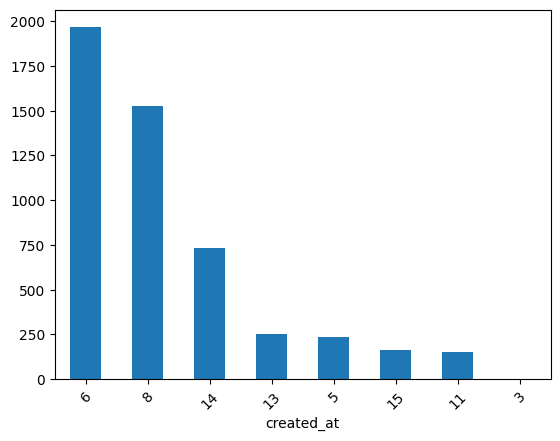

In [ ]:
hour.value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [60]:
polls_question.loc[polls_question['id'].isin([170,169,186,211,290])]

,id,question_text,created_at
70,169,축제에서 공연을 제일 잘 할거 같은 사람은?,2023-03-31 15:23:29
71,170,처음 보는 사람과 가장 빨리 친해질 것 같은 사람은?,2023-03-31 15:23:30
87,186,vote,2023-04-01 11:09:15
112,211,앞으로의 인생을 가장 재미있게 살것 같은 사람은?,2023-04-01 11:09:20
191,290,모든 사람과 잘 지낼 것 같은 사람은?,2023-04-01 11:09:35


In [30]:
polls_question.loc[polls_question['id']==111]

,id,question_text,created_at
12,111,마스크가 잘 어울리는 사람은?,2023-03-31 15:22:59


In [26]:
df = pd.merge(polls_question,report,how='left',on='id')

In [36]:
df1 = df[df['question_text'].str.contains('vote',case=False)]

In [74]:
df2 = pd.merge(df1,piece_count,how='left',on='id') 
df2

,id,question_text,created_at,count,count1
0,186,vote,2023-04-01 11:09:15,45.0,1991.0
1,483,vote,2023-05-02 05:33:11,73.0,1615.0
2,639,vote,2023-05-11 15:52:44,16.0,580.0
3,696,vote,2023-05-15 13:58:24,34.0,411.0
4,712,vote,2023-05-15 13:58:30,15.0,381.0
5,725,vote,2023-05-15 13:58:35,7.0,392.0
6,736,vote,2023-05-15 13:58:40,32.0,358.0
7,807,vote,2023-05-15 13:59:11,34.0,357.0
8,881,vote,2023-05-15 13:59:44,39.0,365.0
9,940,vote,2023-05-15 14:00:10,20.0,333.0


In [81]:
vote_text = df2['id'].to_list()

In [28]:
polls_question[polls_question['question_text'].str.contains('vote', case=False)].head(5)

,id,question_text,created_at
87,186,vote,2023-04-01 11:09:15
384,483,vote,2023-05-02 05:33:11
540,639,vote,2023-05-11 15:52:44
587,696,vote,2023-05-15 13:58:24
603,712,vote,2023-05-15 13:58:30


##### polls_questionpiece

In [5]:
polls_questionpiece = pd.read_parquet('gs://sprintda05_final_project/votes/polls_questionpiece.parquet', engine='pyarrow')

In [15]:
polls_questionpiece

,id,is_voted,created_at,question_id,is_skipped
0,998458,1,2023-04-28 12:27:22,252,0
1,998459,1,2023-04-28 12:27:22,244,0
2,998460,1,2023-04-28 12:27:22,183,0
3,998461,1,2023-04-28 12:27:22,101,0
4,998462,1,2023-04-28 12:27:22,209,0
...,...,...,...,...,...
1265471,208385226,0,2024-05-07 11:32:30,960,0
1265472,208385227,0,2024-05-07 11:32:30,1402,0
1265473,208385228,0,2024-05-07 11:32:30,1676,0
1265474,208385229,0,2024-05-07 11:32:30,3115,0


In [13]:
piece_count = polls_questionpiece.groupby(['question_id'])[['id']].count().sort_values(by='id',ascending=False).reset_index().rename(columns={'id' : 'count1','question_id': 'id'})

In [ ]:
piece_count

,id,count1
0,170,2030
1,290,2021
2,169,2017
3,211,2009
4,186,1991
...,...,...
4939,4926,1
4940,4556,1
4941,4551,1
4942,4931,1


In [51]:
piece_count.describe()

,id,count1
count,4944.000000,4944.000000
mean,2587.901699,255.961974
std,1441.905349,478.950128
min,99.000000,1.000000
25%,1344.750000,14.000000
50%,2580.500000,33.000000
75%,3816.250000,355.000000
max,5133.000000,2030.000000


In [87]:
vote_questionpiece = polls_questionpiece.loc[polls_questionpiece['question_id'].isin(vote_text),'id'].to_list()

In [12]:
questionpiece_voted = polls_questionpiece.groupby(['question_id'])[['is_voted']].sum().sort_values(by='is_voted',ascending=False).reset_index().rename(columns={'is_voted': 'count2','question_id': 'id'})

In [17]:
piece_voted_count = pd.merge(piece_count,questionpiece_voted,how='left',on='id').sort_values(by='count1',ascending=False)

In [19]:
piece_voted_count['ratio'] = piece_voted_count['count2'] / piece_voted_count['count1']

In [25]:
piece_voted_count.describe()

,id,count1,count2,ratio
count,4944.000000,4944.000000,4944.000000,4944.000000
mean,2587.901699,255.961974,246.498180,0.801884
std,1441.905349,478.950128,470.798358,0.208031
min,99.000000,1.000000,0.000000,0.000000
25%,1344.750000,14.000000,10.000000,0.729730
50%,2580.500000,33.000000,27.000000,0.837838
75%,3816.250000,355.000000,340.000000,0.963418
max,5133.000000,2030.000000,1998.000000,1.000000


##### polls_questionreport

In [45]:
polls_questionreport = pd.read_parquet('gs://sprintda05_final_project/votes/polls_questionreport.parquet', engine='pyarrow')

In [41]:
polls_questionreport

,id,reason,created_at,question_id,user_id
0,1,이 질문은 재미없어요,2023-04-19 06:20:35,250,837556
1,2,이 질문은 재미없어요,2023-04-19 06:58:09,113,837672
2,3,불쾌한 내용이 포함되어 있음,2023-04-19 06:58:17,113,837672
3,4,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:42,119,837922
4,5,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:50,119,837922
...,...,...,...,...,...
51419,55763,그냥 싫어,2024-04-19 12:49:57,350,1542237
51420,55764,그냥 싫어,2024-04-19 12:50:02,3541,1542237
51421,55765,그냥 싫어,2024-04-28 06:35:38,392,984791
51422,55766,그냥 싫어,2024-04-30 04:48:25,4979,1583634


In [65]:
polls_questionreport.groupby(['question_id'])[['id']].count().reset_index().rename(columns={'id': 'count'}).sort_values(by='count', ascending=False)

,question_id,count
12,111,988
311,410,803
299,398,660
325,424,533
206,305,493
...,...,...
2439,2980,1
1801,2019,1
2441,2983,1
2443,2986,1


In [ ]:
polls_questionreport.loc[polls_questionreport['question_id']==111]

In [60]:
report = polls_questionreport.groupby(['question_id'])[['id']].count().reset_index().rename(columns={'id' : 'count', 'question_id': 'id'}).sort_values(by='count',ascending=False)

In [64]:
report.head(5) 

,id,count
12,111,988
311,410,803
299,398,660
325,424,533
206,305,493


In [ ]:
report.describe()

,id,count
count,3135.000000,3135.000000
mean,1921.597448,16.403190
std,1231.248878,38.455215
min,99.000000,1.000000
25%,892.500000,1.000000
50%,1682.000000,4.000000
75%,2849.000000,19.000000
max,5110.000000,988.000000


##### polls_questionset

In [8]:
polls_questionset = pd.read_parquet('gs://sprintda05_final_project/votes/polls_questionset.parquet', engine='pyarrow')

In [68]:
polls_questionset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158384 entries, 0 to 158383
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      158384 non-null  int64         
 1   question_piece_id_list  158384 non-null  object        
 2   opening_time            158384 non-null  datetime64[ns]
 3   status                  158384 non-null  object        
 4   created_at              158384 non-null  datetime64[ns]
 5   user_id                 158384 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 7.3+ MB


In [21]:
polls_questionset

,id,question_piece_id_list,opening_time,status,created_at,user_id
0,99817,"[998458, 998459, 998460, 998461, 998462, 99846...",2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
1,99830,"[998588, 998589, 998590, 998591, 998592, 99859...",2023-04-28 12:28:07,F,2023-04-28 12:28:07,849438
2,99840,"[998689, 998691, 998693, 998695, 998697, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,847375
3,99841,"[998688, 998690, 998692, 998694, 998696, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,849446
4,99848,"[998768, 998769, 998770, 998771, 998772, 99877...",2023-04-28 12:28:57,F,2023-04-28 12:28:57,849477
...,...,...,...,...,...,...
158379,20838253,"[208383291, 208383292, 208383293, 208383294, 2...",2024-05-05 14:46:27,C,2024-05-05 14:06:27,1251933
158380,20838344,"[208384201, 208384202, 208384203, 208384204, 2...",2024-05-06 11:38:20,C,2024-05-06 10:58:20,876072
158381,20838419,"[208384951, 208384952, 208384953, 208384954, 2...",2024-05-07 00:55:00,C,2024-05-07 00:15:00,1208878
158382,20838445,"[208385211, 208385212, 208385213, 208385214, 2...",2024-05-07 12:09:08,C,2024-05-07 11:29:08,1001607


In [71]:
polls_questionset['question_piece_id_list'] =  polls_questionset['question_piece_id_list'].map(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [82]:
explode_questionset = polls_questionset.explode('question_piece_id_list')

In [88]:
# text가 vote인 질문을 사용한 유저
explode_questionset.loc[explode_questionset['question_piece_id_list'].isin(vote_questionpiece)]

,id,question_piece_id_list,opening_time,status,created_at,user_id
11,99877,999061,2023-04-28 12:30:30,F,2023-04-28 12:30:30,849452
47,100144,1001728,2023-04-28 13:27:10,F,2023-04-28 12:37:10,849446
82,100659,1006883,2023-04-28 13:49:51,F,2023-04-28 12:59:52,849464
102,100956,1009852,2023-04-28 14:05:03,F,2023-04-28 13:15:03,850006
179,101876,1019049,2023-04-28 13:57:38,F,2023-04-28 13:57:38,849535
...,...,...,...,...,...,...
158367,20834940,208350163,2024-03-17 09:05:21,O,2024-03-17 08:25:21,1165963
158368,20835030,208351069,2024-03-18 15:35:54,C,2024-03-18 14:55:54,1260879
158375,20836712,208367887,2024-04-18 03:03:30,O,2024-04-18 02:23:30,1087583
158379,20838253,208383297,2024-05-05 14:46:27,C,2024-05-05 14:06:27,1251933


In [ ]:
questionset = polls_questionset.groupby(['user_id'])[['id']].count().sort_values(by='id', ascending=False).reset_index()
questionset

,user_id,id
0,952220,370
1,849103,286
2,1184703,215
3,1162477,203
4,1213990,202
...,...,...
4967,1500850,1
4968,899404,1
4969,872546,1
4970,872930,1


In [24]:
conversion = pd.merge(payment,questionset,how='left',on='user_id')
conversion

,user_id,id_x,id_y
0,1527451,60,NaN
1,1246471,51,NaN
2,1141603,35,NaN
3,1204373,34,NaN
4,1142775,30,NaN
...,...,...,...
59187,1196164,1,NaN
59188,1196170,1,NaN
59189,1196185,1,NaN
59190,1196197,1,NaN


In [10]:
all_users = set(accounts_user['id'].unique())
payment_users = set(accounts_paymenthistory['user_id'].unique())
questionset_users = set(polls_questionset['user_id'].unique())

In [14]:
payment_in_users = payment_users.intersection(all_users)
questionset_in_users = questionset_users.intersection(all_users)
both_users = payment_users.intersection(questionset_users)

In [16]:
print(len(payment_in_users),len(questionset_in_users),len(both_users))

59192 4972 410


In [17]:
data = {'결제자' : len(payment_in_users), 
       '질문세트 작성자' : len(questionset_in_users), 
       '둘 다 작성한 유저' : len(both_users)}

In [9]:
print("🔍 사용자 ID 기반 정확한 전환율 분석")
print("=" * 50)

print("📊 **Step 1: 각 데이터셋의 사용자 ID 확인**")

# 각 데이터셋의 사용자 ID 타입과 분포 확인
print(f"• df_user['id'] 타입: {accounts_user['id'].dtype}")
print(f"• df_payment['user_id'] 타입: {accounts_paymenthistory['user_id'].dtype}")  
print(f"• df_questionset['user_id'] 타입: {polls_questionset['user_id'].dtype}")

print(f"\n• df_user ID 범위: {accounts_user['id'].min()} ~ {accounts_user['id'].max()}")
print(f"• df_payment user_id 범위: {accounts_paymenthistory['user_id'].min()} ~ {accounts_paymenthistory['user_id'].max()}")
print(f"• df_questionset user_id 범위: {polls_questionset['user_id'].min()} ~ {polls_questionset['user_id'].max()}")

# 실제 사용자 집합 정의
all_users = set(accounts_user['id'].unique())
payment_users = set(accounts_paymenthistory['user_id'].unique())
questionset_users = set(polls_questionset['user_id'].unique())

print(f"\n📋 **Step 2: 사용자 집합 재확인**")
print(f"• 전체 등록 사용자: {len(all_users):,}명")
print(f"• 결제한 사용자: {len(payment_users):,}명")
print(f"• 질문세트 사용한 사용자: {len(questionset_users):,}명")

# 교집합 확인
payment_in_users = payment_users.intersection(all_users)
questionset_in_users = questionset_users.intersection(all_users)
both_users = payment_users.intersection(questionset_users)

print(f"\n🔍 **Step 3: 교집합 분석**")
print(f"• 전체 사용자 중 결제한 사용자: {len(payment_in_users):,}명")
print(f"• 전체 사용자 중 질문세트 사용한 사용자: {len(questionset_in_users):,}명")
print(f"• 결제도 하고 질문세트도 사용한 사용자: {len(both_users):,}명")

# 사용자가 실제로 존재하는지 확인
print(f"\n🔎 **Step 4: 사용자 존재 여부 확인**")
payment_not_in_users = payment_users - all_users
questionset_not_in_users = questionset_users - all_users

print(f"• 결제했지만 사용자 테이블에 없는 ID: {len(payment_not_in_users):,}개")
print(f"• 질문세트 사용했지만 사용자 테이블에 없는 ID: {len(questionset_not_in_users):,}개")

if len(payment_not_in_users) > 0:
    print(f"  예시: {list(payment_not_in_users)[:5]}")
if len(questionset_not_in_users) > 0:
    print(f"  예시: {list(questionset_not_in_users)[:5]}")

# 올바른 전환율 계산
print(f"\n✅ **Step 5: 올바른 전환율 계산**")

# 1. 전체 사용자 중 결제 전환율
basic_conversion = len(payment_in_users) / len(all_users) * 100
print(f"• 전체 사용자 → 결제 전환율: {basic_conversion:.2f}% ({len(payment_in_users):,}/{len(all_users):,})")

# 2. 질문세트 사용자 중 결제 전환율  
if len(questionset_in_users) > 0:
    questionset_to_payment = len(both_users) / len(questionset_in_users) * 100
    print(f"• 질문세트 사용자 → 결제 전환율: {questionset_to_payment:.2f}% ({len(both_users):,}/{len(questionset_in_users):,})")

# 3. 결제 사용자 중 질문세트 사용률
if len(payment_in_users) > 0:
    payment_to_questionset = len(both_users) / len(payment_in_users) * 100
    print(f"• 결제 사용자 중 질문세트 사용률: {payment_to_questionset:.2f}% ({len(both_users):,}/{len(payment_in_users):,})")

# 사용자 행동 패턴 분석
print(f"\n🎯 **사용자 행동 패턴**")
payment_only = payment_users - questionset_users
questionset_only = questionset_users - payment_users

print(f"• 결제만 하는 사용자: {len(payment_only):,}명 ({len(payment_only)/len(payment_users)*100:.1f}%)")
print(f"• 질문세트만 사용하는 사용자: {len(questionset_only):,}명 ({len(questionset_only)/len(questionset_users)*100:.1f}%)")
print(f"• 둘 다 하는 사용자: {len(both_users):,}명")

print(f"\n📊 **결론**:")
if len(payment_only) > len(both_users) * 10:
    print(f"• 질문세트는 최근 추가된 기능으로 보임")
    print(f"• 기존 결제 사용자들은 다른 기능을 주로 사용")
    print(f"• 질문세트 → 결제 전환율: {questionset_to_payment:.1f}%는 의미있는 지표")
else:
    print(f"• 질문세트와 결제 기능이 밀접하게 연관됨")

🔍 사용자 ID 기반 정확한 전환율 분석
📊 **Step 1: 각 데이터셋의 사용자 ID 확인**
• df_user['id'] 타입: int64
• df_payment['user_id'] 타입: int64
• df_questionset['user_id'] 타입: int64

• df_user ID 범위: 831956 ~ 1583733
• df_payment user_id 범위: 833041 ~ 1583632
• df_questionset user_id 범위: 838023 ~ 1583358

📋 **Step 2: 사용자 집합 재확인**
• 전체 등록 사용자: 677,085명
• 결제한 사용자: 59,192명
• 질문세트 사용한 사용자: 4,972명

🔍 **Step 3: 교집합 분석**
• 전체 사용자 중 결제한 사용자: 59,192명
• 전체 사용자 중 질문세트 사용한 사용자: 4,972명
• 결제도 하고 질문세트도 사용한 사용자: 410명

🔎 **Step 4: 사용자 존재 여부 확인**
• 결제했지만 사용자 테이블에 없는 ID: 0개
• 질문세트 사용했지만 사용자 테이블에 없는 ID: 0개

✅ **Step 5: 올바른 전환율 계산**
• 전체 사용자 → 결제 전환율: 8.74% (59,192/677,085)
• 질문세트 사용자 → 결제 전환율: 8.25% (410/4,972)
• 결제 사용자 중 질문세트 사용률: 0.69% (410/59,192)

🎯 **사용자 행동 패턴**
• 결제만 하는 사용자: 58,782명 (99.3%)
• 질문세트만 사용하는 사용자: 4,562명 (91.8%)
• 둘 다 하는 사용자: 410명

📊 **결론**:
• 질문세트는 최근 추가된 기능으로 보임
• 기존 결제 사용자들은 다른 기능을 주로 사용
• 질문세트 → 결제 전환율: 8.2%는 의미있는 지표


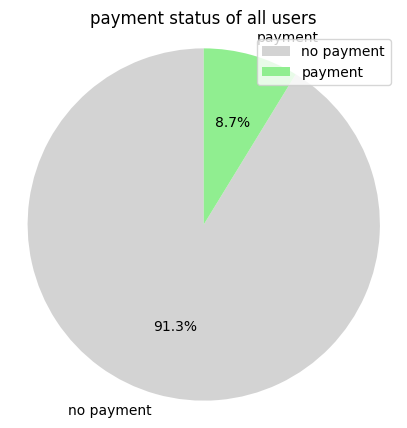

In [30]:
import matplotlib.pyplot as plt

# 전체 사용자 대비 결제 여부
labels = ['no payment', 'payment']
sizes = [len(all_users) - len(payment_in_users), len(payment_in_users)]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgray', 'lightgreen'])
plt.axis('equal')
plt.title('payment status of all users')
plt.legend(loc= 'upper right')
plt.show()

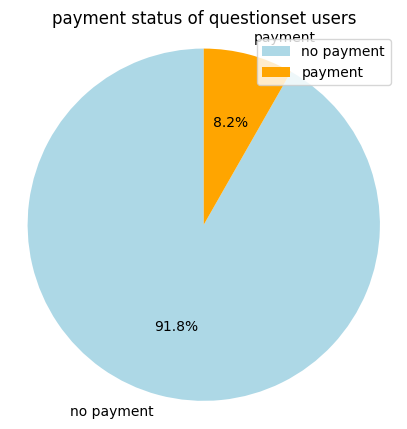

In [31]:
# 질문세트 사용자 대비 결제 여부
labels = ['no payment', 'payment']
sizes = [len(questionset_in_users) - len(both_users), len(both_users)]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.axis('equal')
plt.title('payment status of questionset users')
plt.legend(loc= 'upper right')
plt.show()


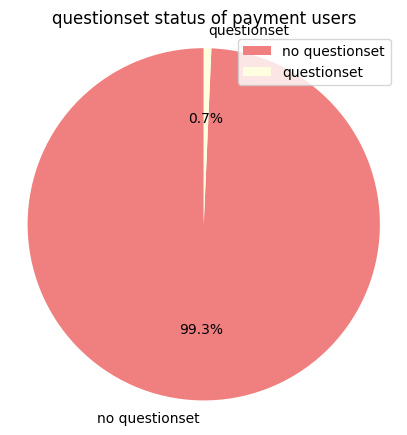

In [32]:
# 결제 사용자 중 질문세트 사용 여부
labels = ['no questionset', 'questionset']
sizes = [len(payment_in_users) - len(both_users), len(both_users)]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightyellow'])
plt.axis('equal')
plt.title('questionset status of payment users')
plt.legend(loc= 'upper right')
plt.show()


##### polls_usercandidate

In [ ]:
polls_usercandidate = pd.read_parquet('gs://sprintda05_final_project/votes/polls_usercandidate.parquet', engine='pyarrow')

##### hackle_events

In [3]:
hackle_events = pd.read_parquet('gs://sprintda05_final_project/hackle/hackle_events.parquet', engine='pyarrow')

In [4]:
hackle_events

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,00000533-3f1c-4b3b-81f1-0c8f35754b4e,,,NaN,NaN,NaN,NaN
1,00000716-27e9-4e72-a602-d0ce61784b06,2023-07-18 21:07:24,click_question_open,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,00000716-27e9-4e72-a602-d0ce61784b06,,,64.0,436.0,4830.0,NaN
2,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,2023-08-06 20:18:03,click_bottom_navigation_profile,6bcea65d-9f40-46fc-888c-700fe707483f,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,,,26.0,174.0,4729.0,NaN
3,00000981-5e2a-4111-993e-4f1891ad9a53,2023-08-05 01:46:10,view_shop,XVYNT6zfhFWqIg9omwg2AHDjTLx2,00000981-5e2a-4111-993e-4f1891ad9a53,,,61.0,44.0,142.0,NaN
4,00000a7a-ba72-4332-b4a9-7910670aaeb2,2023-07-24 15:03:37,click_bottom_navigation_lab,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,00000a7a-ba72-4332-b4a9-7910670aaeb2,,,119.0,545.0,3287.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11441314,fffff54e-e730-418f-8080-4eff7e2641f2,2023-08-08 01:40:00,view_timeline_tap,n9RSY5wNfvURIV3sKeXZiYWiVSD3,fffff54e-e730-418f-8080-4eff7e2641f2,,,27.0,92.0,326.0,NaN
11441315,fffff57d-6c79-46b3-a87b-4bfa900ef11b,2023-07-23 09:30:22,skip_question,CB3F11FD-4B78-4496-96E7-3B4174C123E9,fffff57d-6c79-46b3-a87b-4bfa900ef11b,,,0.0,0.0,300.0,799.0
11441316,fffff632-2d70-4190-addd-6ae2f2399876,2023-07-18 18:13:30,view_lab_tap,AwpRr0ll7bTfFV22MIXHDASEpz72,fffff632-2d70-4190-addd-6ae2f2399876,,,29.0,97.0,284.0,NaN
11441317,fffffb07-af2f-4cce-a26e-1dcc97c74b14,2023-07-21 15:37:27,view_timeline_tap,H8oiWwKxRiYByNykbb2GsVYd8JU2,fffffb07-af2f-4cce-a26e-1dcc97c74b14,,,49.0,527.0,932.0,NaN
